In [39]:
from api_funcs import *

In [40]:
posts = subreddit_posts('Uber',200) #getting info from page Uber on Reddit, the limit is 200 posts

In [41]:
posts.to_csv('Posts.csv',index=False) #transforming posts to a csv file

In [42]:
replies = replies_to_posts(posts)#getting replies from posts

In [43]:
replies.to_csv('Comments.csv',index=False)

In [44]:
import re 

import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
comments = pd.read_csv('Comments.csv') 
comments.dropna(subset=['Reply'],inplace=True) 
comments = comments[comments.Reply != '[deleted]']
#We drop [deleted] as it doesn't contribute much to the sentiment analysis

In [46]:
comments.Reply = comments.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x))) 
#word_tokenize will tonkinze the text into individual word and it can recognize symbol in text and remove it.
#tonkenize will turn Reply to list format, so we need to change it back by using "' '.join" - joining the varibles in the list with a space in between
#We are applying a function over the Reply column, we called lambda as x which means we are appointing each x to the function:''.join(nltk.word_tokenize(x)
comments

,Reply,Upvote,Time,Key
0,Write them a letter Uber 1455 Market St # 400 ...,4.0,2020-09-17 03:23:49,0.0
1,'Forgot your password ' . Fix it yourself .,3.0,2020-09-17 04:26:58,0.0
2,"When you contact support , you 're not actuall...",2.0,2020-09-17 02:11:08,0.0
3,Fuck Uber,1.0,2020-09-17 11:35:02,0.0
4,You could take over the account and delete it .,1.0,2020-09-17 12:04:59,0.0
...,...,...,...,...
1980,> They tried making the argument of them being...,0.0,2020-08-19 08:16:22,199.0
1981,No . Done enough googling for your damn uninfo...,0.0,2020-08-19 08:24:07,199.0
1982,You ’ re not going to post any links because y...,1.0,2020-08-19 08:30:53,199.0
1983,"Child , child ! Calm down . I gave you the dam...",0.0,2020-08-19 08:34:54,199.0


Data Exploration

In [47]:
#Finding Bigrams or Trigrams
from nltk.collocations import *
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ') 
#We look at the first 10000 rows and indicate that we want to look at column Reply 
#Using str.cat(sep='. ') to join all replies into a single string and seperate them by '. '

In [48]:
all_text = nltk.word_tokenize(all_text)
#tonkenize all-test to turn it into a list

In [49]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10))

[('gon', 'na'), ('Of', 'course'), ('Prop', '22'), ('ABC', 'test'), ('prop', '22'), ('independent', 'contractors'), ('--', '--'), ('speed', 'limit'), ('Good', 'luck'), ('health', 'insurance')]


Some of the more interesting bigrams shown above are Prop 22, ABC test,speed limit, independent contractor and health insurance. These birgams show major public's interest towards the issue of how Uber classifies its driver’s legal status. By using legal language in its contract with drivers to define them as “partners” and not “employees”, Uber then holds no obligation to provide any work benefits such as a minimum wage, worker’s compensation, or health insurance.

In [50]:
#Wordcloud 

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [51]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

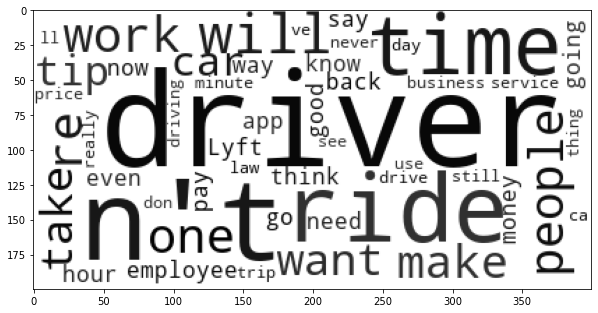

In [52]:
stp = STOPWORDS.copy()
stp.add('Uber')
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp,collocations=False)
#wordcloud also take into bigrams and trigrams and to avoid that, we use the parameters 'collocations = False'

# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

One of the biggest words shown in the graph is 'driver' which indicates the rising issue in Uber business revolves around Uber's drivers.Uber drivers have been protesting for better working conditions around the world which caused huge disrupt to the reputation of the buninesss as well as its stock market value as stock-holders start to lose trust in the company.     

Sentiment analysis by Vader

In [55]:
#Using Vader to perform sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants
#FIRST, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [56]:
comments[['neg','neu','pos','compound']] = comments.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [57]:
comments.head(10)

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,Write them a letter Uber 1455 Market St # 400 ...,4.0,2020-09-17 03:23:49,0.0,0.000,1.000,0.000,0.0000
1,'Forgot your password ' . Fix it yourself .,3.0,2020-09-17 04:26:58,0.0,0.000,1.000,0.000,0.0000
2,"When you contact support , you 're not actuall...",2.0,2020-09-17 02:11:08,0.0,0.057,0.910,0.033,-0.4092
3,Fuck Uber,1.0,2020-09-17 11:35:02,0.0,0.778,0.222,0.000,-0.5423
4,You could take over the account and delete it .,1.0,2020-09-17 12:04:59,0.0,0.000,1.000,0.000,0.0000
5,Idk,-1.0,2020-09-17 07:02:44,0.0,1.000,0.000,0.000,-0.1027
6,"I tried that , actually . The email does n't a...",1.0,2020-09-17 05:04:02,0.0,0.146,0.854,0.000,-0.3400
7,That sucks balls . I do n't have a Hub where I...,2.0,2020-09-17 02:25:41,0.0,0.152,0.848,0.000,-0.3612
8,Try ordering a ride for yourself . See how fas...,1.0,2020-09-17 06:49:13,0.0,0.000,1.000,0.000,0.0000
9,Call and harass them 1800 593 7069 this is the...,1.0,2020-09-17 07:57:36,1.0,0.255,0.711,0.034,-0.8151


In [58]:
comments.to_csv('Comments1.csv',index=False)